<a href="https://colab.research.google.com/github/hitesh-bhatnagar/CodeClause_Internship_Handwritten_Digits_Recognition/blob/main/Recognize_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os

In [2]:
(X_train , y_train) ,( X_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# convert labels to categorical One Hot Encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Function to convert list or array of images and their corresponding labels into sequences.

In [5]:
def create_sequences(images , labels, seq_length):

  seq_images = []
  seq_labels = []

  # Loop over the range of inxs of images and labels
  for start in range(len(images) - seq_length + 1):
    end = start + seq_length
    seq_images.append(images[start:end])
    seq_labels.append(labels[start:end])

  # Convert the lists to numpy arrays
  return np.array(seq_images) , np.array(seq_labels)



seq_length = 10
X_train_seq , y_train_seq = create_sequences(X_train , y_train , seq_length)
X_test_seq , y_test_seq = create_sequences(X_test , y_test , seq_length)

Building a model for feature extraction and sequence recognition

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Conv2D , MaxPooling2D , Flatten , Dense , Dropout , LSTM , TimeDistributed

# Reshape sequences to add channel dimension
X_train_seq = np.expand_dims(X_train_seq , axis = -1)
X_test_seq = np.expand_dims(X_test_seq , axis = -1)

# inpuit shape (seq_length, height, width ,channels)

input_shape = (seq_length , 28 , 28 , 1)

inputs = Input(shape = input_shape)



In [8]:
# TimeDistributed CNN

cnn = TimeDistributed(Conv2D(32 , (3,3) , activation = 'relu'))(inputs)
cnn = TimeDistributed(MaxPooling2D((2,2)))(cnn)
cnn = TimeDistributed(Flatten())(cnn)

In [9]:
from tensorflow.keras.models import Model

# LSTM for sequence recognition

lstm = LSTM(128 ,return_sequences = True)(cnn)
output = TimeDistributed(Dense(10 , activation = 'softmax'))(lstm)

model = Model(inputs , output)
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 28, 28, 1)]   0         
                                                                 
 time_distributed (TimeDist  (None, 10, 26, 26, 32)    320       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 13, 13, 32)    0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 10, 5408)          0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, 10, 128)           2834944   
                                                             

In [11]:
history = model.fit(X_train_seq , y_train_seq , epochs = 10 , batch_size = 64 , validation_split = 0.2)


Epoch 1/10
750/750 [==============================] - 59s 75ms/step - loss: 0.1234 - accuracy: 0.9666 - val_loss: 0.0578 - val_accuracy: 0.9831
Epoch 2/10
750/750 [==============================] - 56s 75ms/step - loss: 0.0075 - accuracy: 0.9992 - val_loss: 0.0532 - val_accuracy: 0.9847
Epoch 3/10
750/750 [==============================] - 56s 74ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0538 - val_accuracy: 0.9853
Epoch 4/10
750/750 [==============================] - 56s 75ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0529 - val_accuracy: 0.9857
Epoch 5/10
750/750 [==============================] - 56s 75ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0559 - val_accuracy: 0.9851
Epoch 6/10
750/750 [==============================] - 56s 75ms/step - loss: 5.3247e-04 - accuracy: 0.9999 - val_loss: 0.0645 - val_accuracy: 0.9840
Epoch 7/10
750/750 [==============================] - 57s 76ms/step - loss: 6.1278e-04 - accuracy: 0.9999 - val_loss: 0.0577 - val_a

In [12]:
test_loss , test_acc = model.evaluate(X_test_seq , y_test_seq)
print(f'Test accuracy : {test_acc}')

313/313 [==============================] - 5s 15ms/step - loss: 0.0519 - accuracy: 0.9861
Test accuracy : 0.9861475229263306


In [13]:
model.save('Sequence_digit_recognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


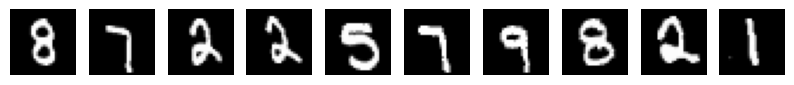

1/1 [==============================] - 0s 29ms/step
True sequence: [8 7 2 2 5 7 9 8 2 1]
Predicted sequence: [8 7 2 2 5 7 9 8 2 1]


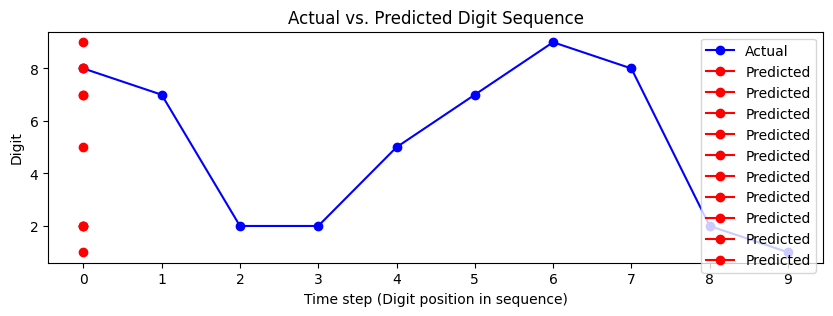

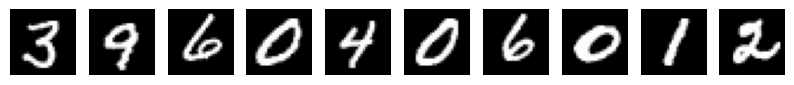

1/1 [==============================] - 0s 26ms/step
True sequence: [3 9 6 0 4 0 6 0 1 2]
Predicted sequence: [3 9 6 0 4 0 6 0 1 2]


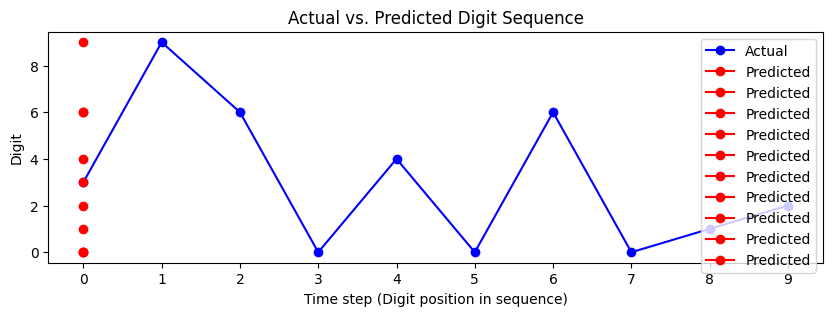

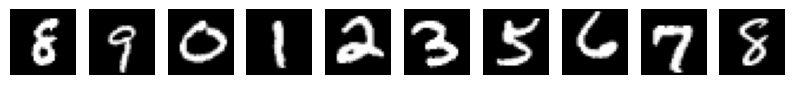

1/1 [==============================] - 0s 26ms/step
True sequence: [8 9 0 1 2 3 5 6 7 8]
Predicted sequence: [8 9 0 1 2 3 5 6 7 8]


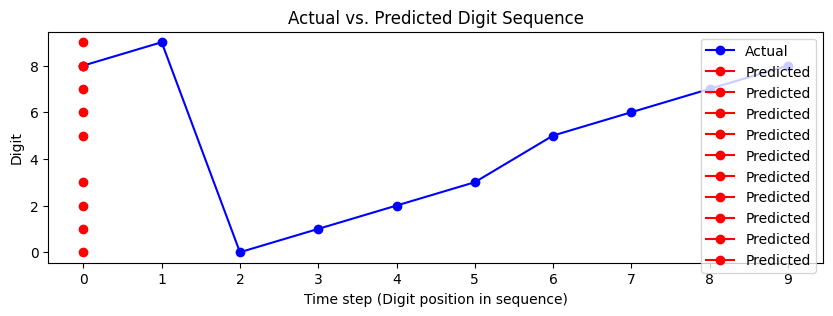

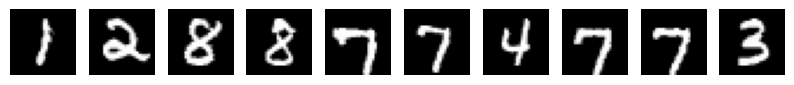

1/1 [==============================] - 0s 29ms/step
True sequence: [1 2 8 8 7 7 4 7 7 3]
Predicted sequence: [1 2 8 8 7 7 4 7 7 3]


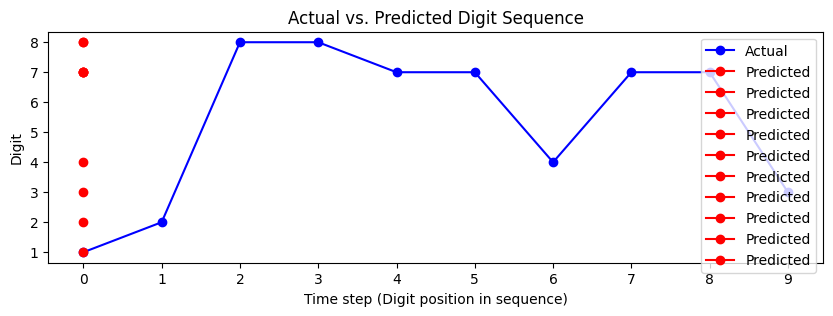

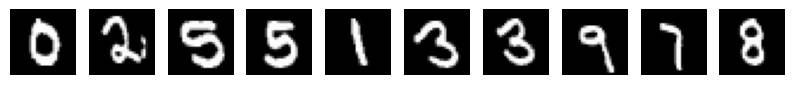

1/1 [==============================] - 0s 27ms/step
True sequence: [0 2 5 5 1 3 3 9 7 8]
Predicted sequence: [0 2 5 5 1 3 3 9 7 8]


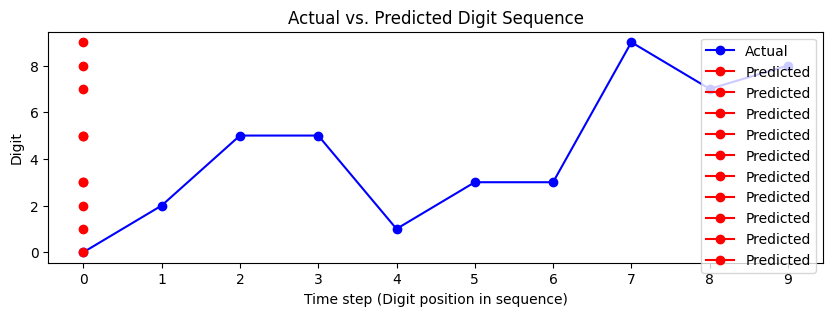

In [22]:
# Display random images from the dataset and then running the saved model to predict the digits

def display_seq(images):

  plt.figure(figsize = (10,1))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(images[i].squeeze() , cmap = 'gray')
    plt.axis('off')

  plt.show()

# function to plot predictions against actual values

def plot_predictions(true_digits, predicted_digits):

    plt.figure(figsize=(10, 3))
    plt.plot(true_digits, 'bo-', label='Actual')
    plt.plot(predicted_labels, 'ro-', label='Predicted')
    plt.xticks(range(len(true_digits)))
    plt.xlabel('Time step (Digit position in sequence)')
    plt.ylabel('Digit')
    plt.title('Actual vs. Predicted Digit Sequence')
    plt.legend()
    plt.show()



num_sequences = 5 # number of seq to generate
for i in range(num_sequences):
  random_idx = np.random.randint(0,len(X_test_seq))
  random_sequence = X_test_seq[random_idx]
  true_labels = y_test_seq[random_idx]

  display_seq(random_sequence)

  predicted_labels = model.predict(np.expand_dims(random_sequence , axis = 0))

  # converting predictions to digit labels
  predicted_labels = np.argmax(predicted_labels , axis = -1)
  true_digits = np.argmax(true_labels , axis = -1)

  print(f"True sequence: {true_digits}")
  print(f"Predicted sequence: {predicted_labels[0]}")

  # plot the actual vs predicted values
  plot_predictions(true_digits , predicted_labels)

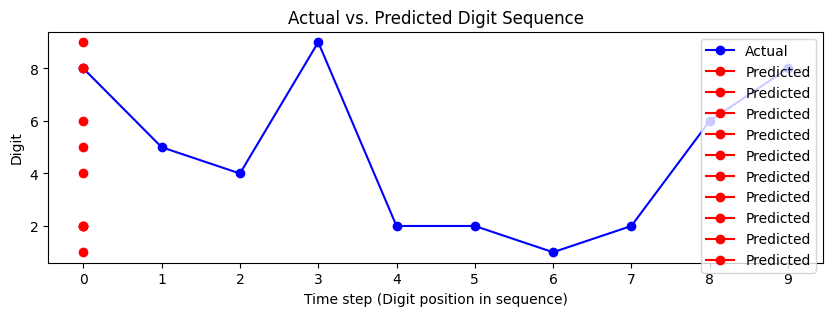